In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


        
spark = SparkSession \
        .builder \
        .appName("Test Spark") \
        .config("spark.jars", "/opt/postgresql-42.4.0.jar") \
        .config("spark.executor.memory", "20g") \
        .master("spark://131.225.58.251:7077") \
        .getOrCreate() \



#spark.conf.set("spark.executor.memory", "20g")
#spark.conf.set("spark.executor.cores", "8")





22/06/28 16:21:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
df = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "(select *,  split_part(storageclass, '.', 1) as vo from billinginfo where datestamp > '2022-06-21 00:00:00') as foo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "16") \
     .option("partitionColumn", "datestamp") \
     .option("lowerBound", "2022-06-21 00:00:00") \
     .option("upperBound", "2022-06-27 23:59:59") \
     .option("fetchsize", 1000000) \
     .load()



In [3]:
print("Number of entries is ", df.count())


Number of entries is  58376963


In [4]:
from pyspark.sql import functions as F
df= df.withColumn("date", F.date_trunc('hour',F.to_timestamp("datestamp","yyyy-MM-dd HH:mm:ss 'UTC'")))
df.select('date').show()

+-------------------+
|               date|
+-------------------+
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
|2022-06-21 00:00:00|
+-------------------+
only showing top 20 rows



In [5]:
df1= df.select('date' ,'transfersize' )
df1.show()

+-------------------+------------+
|               date|transfersize|
+-------------------+------------+
|2022-06-21 00:00:00|      221795|
|2022-06-21 00:00:00|    88948745|
|2022-06-21 00:00:00|    77494528|
|2022-06-21 00:00:00|    76669370|
|2022-06-21 00:00:00|    77173056|
|2022-06-21 00:00:00|    71436341|
|2022-06-21 00:00:00|    77616233|
|2022-06-21 00:00:00|           2|
|2022-06-21 00:00:00|          10|
|2022-06-21 00:00:00|          10|
|2022-06-21 00:00:00|    75375666|
|2022-06-21 00:00:00|    91613582|
|2022-06-21 00:00:00|    74592293|
|2022-06-21 00:00:00|   522410540|
|2022-06-21 00:00:00|        4583|
|2022-06-21 00:00:00|      106973|
|2022-06-21 00:00:00|         100|
|2022-06-21 00:00:00|    70892595|
|2022-06-21 00:00:00|    82517319|
|2022-06-21 00:00:00|         750|
+-------------------+------------+
only showing top 20 rows



In [6]:
import findspark
findspark.init()
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 

In [7]:
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [8]:
type(df1)

pyspark.sql.dataframe.DataFrame

In [9]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set(
    "spark.sql.execution.arrow.pyspark.fallback.enabled", "true")

In [10]:
pd_df = df1.toPandas()
#print(pd_df)

In [11]:
print(pd_df)

                        date  transfersize
0        2022-06-21 00:00:00        221795
1        2022-06-21 00:00:00      88948745
2        2022-06-21 00:00:00      77494528
3        2022-06-21 00:00:00      76669370
4        2022-06-21 00:00:00      77173056
...                      ...           ...
58399543 2022-06-28 16:00:00          6945
58399544 2022-06-28 16:00:00          1088
58399545 2022-06-28 16:00:00     339096854
58399546 2022-06-28 16:00:00             2
58399547 2022-06-28 16:00:00         10837

[58399548 rows x 2 columns]


In [12]:
#import pandasql as ps
#ps.sqldf("" )

In [13]:
#pd_df['transfersize']=pd_df['transfersize'].div(2^39)
#pd_df['transfersize']=pd_df['transfersize'].div(1e+12)
#pd_df['transfersize']=pd_df['transfersize'].div(2^40)
#pd_df['transfersize']=pd_df['transfersize'].div(1<<40)
#pd_df['transfersize']=pd_df['transfersize'].replace('\s\w+','').astype(float).div(1000)
pd_df['transfersize']=pd_df['transfersize'].div(math.pow(2, 40))
#pd_df['transfersize']=pd_df['transfersize'].div(1000)

In [14]:
print(pd_df)

                        date  transfersize
0        2022-06-21 00:00:00  2.017214e-07
1        2022-06-21 00:00:00  8.089841e-05
2        2022-06-21 00:00:00  7.048086e-05
3        2022-06-21 00:00:00  6.973039e-05
4        2022-06-21 00:00:00  7.018849e-05
...                      ...           ...
58399543 2022-06-28 16:00:00  6.316441e-09
58399544 2022-06-28 16:00:00  9.895302e-10
58399545 2022-06-28 16:00:00  3.084068e-04
58399546 2022-06-28 16:00:00  1.818989e-12
58399547 2022-06-28 16:00:00  9.856194e-09

[58399548 rows x 2 columns]


In [15]:
pd_df.groupby(['date']).sum()

,transfersize
date,
2022-06-21 00:00:00,26.004821
2022-06-21 01:00:00,27.416167
2022-06-21 02:00:00,27.349680
2022-06-21 03:00:00,30.672053
2022-06-21 04:00:00,22.400393
...,...
2022-06-28 12:00:00,28.210709
2022-06-28 13:00:00,21.475893
2022-06-28 14:00:00,19.774022


In [16]:
pd5=pd_df.sum()

/tmp/ipykernel_129078/2637148350.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd5=pd_df.sum()


In [17]:
print(pd5)

transfersize    4366.546969
dtype: float64


In [18]:
pd4=pd_df.groupby(['date']).sum()
print(pd4)

                     transfersize
date                             
2022-06-21 00:00:00     26.004821
2022-06-21 01:00:00     27.416167
2022-06-21 02:00:00     27.349680
2022-06-21 03:00:00     30.672053
2022-06-21 04:00:00     22.400393
...                           ...
2022-06-28 12:00:00     28.210709
2022-06-28 13:00:00     21.475893
2022-06-28 14:00:00     19.774022
2022-06-28 15:00:00     37.890174
2022-06-28 16:00:00     23.688422

[185 rows x 1 columns]


<AxesSubplot:xlabel='date'>

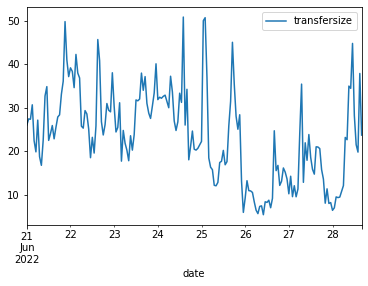

22/06/28 17:15:11 ERROR StandaloneSchedulerBackend: Application has been killed. Reason: Master removed our application: KILLED
22/06/28 17:15:11 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exiting due to error from cluster scheduler: Master removed our application: KILLED
	at org.apache.spark.errors.SparkCoreErrors$.clusterSchedulerError(SparkCoreErrors.scala:218)
	at org.apache.spark.scheduler.TaskSchedulerImpl.error(TaskSchedulerImpl.scala:923)
	at org.apache.spark.scheduler.cluster.StandaloneSchedulerBackend.dead(StandaloneSchedulerBackend.scala:154)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint.markDead(StandaloneAppClient.scala:262)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint$$anonfun$receive$1.applyOrElse(StandaloneAppClient.scala:169)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:115)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.proce

In [19]:
pd4.plot(kind = 'line')